In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_img(img, title=""):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.show()

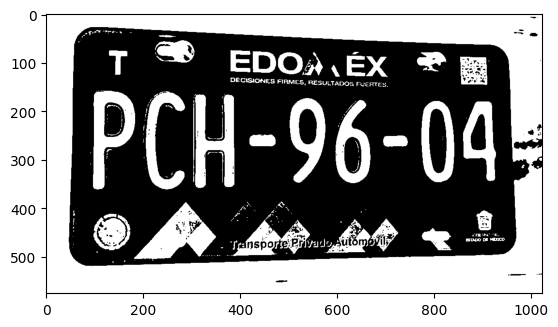

In [5]:
placa_bgr = cv.imread("/Users/miguelcamargorojas/Downloads/placas.jpg")
placa_gray = cv.cvtColor(placa_bgr, cv.COLOR_BGR2GRAY)
placa_bin = cv.threshold(placa_gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
show_img(placa_bin)

In [10]:
(numLabels, labels, stats, centroids) = cv.connectedComponentsWithStats(placa_bin)

In [11]:
numLabels

260

In [12]:
stats

array([[    47,      8,    977,    546, 330478],
       [     0,      0,   1024,    576, 169754],
       [    95,     35,     18,      7,     44],
       ...,
       [   161,    509,      3,      3,      7],
       [   183,    509,      1,      1,      1],
       [   137,    511,      3,      3,      7]],
      shape=(260, 5), dtype=int32)

In [13]:
centroids

array([[ 506.30300353,  276.71899794],
       [ 540.32008082,  307.94299398],
       [ 104.5       ,   37.77272727],
       [  90.17241379,   40.17241379],
       [ 118.66666667,   36.66666667],
       [ 127.11111111,   37.22222222],
       [ 138.28571429,   38.5       ],
       [ 143.        ,   38.        ],
       [ 145.5       ,   39.25      ],
       [ 153.84615385,   39.38461538],
       [  82.5       ,   42.        ],
       [ 122.        ,   40.        ],
       [ 128.5       ,   41.        ],
       [ 174.5       ,   40.        ],
       [  78.        ,   45.5       ],
       [ 248.5       ,   47.25925926],
       [  74.4       ,   48.8       ],
       [  71.        ,   55.        ],
       [ 267.62000823,   77.56566488],
       [  67.4       ,   58.8       ],
       [ 148.29433052,   95.0482509 ],
       [ 397.98983912,   98.52159187],
       [ 448.39266198,  100.77127244],
       [ 225.83333333,   82.83333333],
       [ 503.92098765,  103.02469136],
       [ 554.95825771,  1

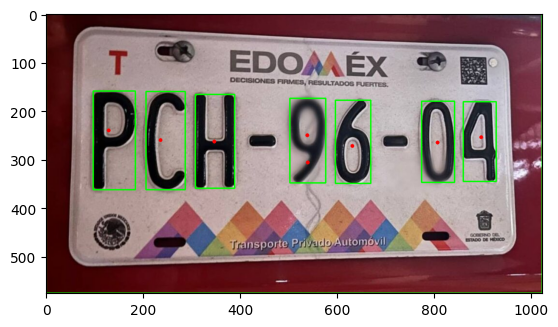

In [28]:
output = placa_bgr.copy()

# loop over the number of unique connected component labels
for i in range(1, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	# if i == 0:
	# 	text = "examining component {}/{} (background)".format(
	# 		i + 1, numLabels)
	# # otherwise, we are examining an actual connected component
	# else:
	# 	text = "examining component {}/{}".format( i + 1, numLabels)
	# # print a status message update for the current connected
	# # component
	# print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv.CC_STAT_LEFT]
	y = stats[i, cv.CC_STAT_TOP]
	w = stats[i, cv.CC_STAT_WIDTH]
	h = stats[i, cv.CC_STAT_HEIGHT]
	area = stats[i, cv.CC_STAT_AREA]
	(cX, cY) = centroids[i]

	# clone our original image (so we can draw on it) and then draw
	# a bounding box surrounding the connected component along with
	# a circle corresponding to the centroid
	if h > 130 and w > 20:
		cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
		cv.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

show_img(output[:, :, ::-1])
